In [ ]:
!pip install adjustText

In [ ]:
%matplotlib inline

from datetime import datetime

import geopandas as gp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from shapely.geometry import Point
from adjustText import adjust_text

In [ ]:
# prompt: import from drive

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/OOKLA_DATA')

In [ ]:
def load_and_intersect(year, quarter, distrital_gdf):
    file_path = f'input/{year}/pe_{year}_{quarter}.shp'
    gdf = gp.read_file(file_path)
    gdf = gdf.to_crs(distrital_gdf.crs)

    # Realiza la intersección espacial
    distrital_data = gp.sjoin(gdf, distrital_gdf, how="inner", op="intersects")

    # Añade columnas de año y trimestre
    distrital_data['year'] = year
    distrital_data['quarter'] = quarter

    return distrital_data

In [ ]:
# Carga el shapefile de los distritos de Lima
distrital_gdf = gp.read_file("/content/drive/MyDrive/OOKLA_DATA/input/Shapefiles Lima Peru/Distritos/Distrital INEI 2023 geogpsperu SuyoPomalia.shp")

# Lista de años y trimestres
years = [2019, 2020, 2021, 2022]
quarters = [1, 2, 3, 4]

# Lista para almacenar los DataFrames
all_data = []


In [ ]:
for year in years:
    for quarter in quarters:
        try:
            data = load_and_intersect(year, quarter, distrital_gdf)
            all_data.append(data)
        except Exception as e:
            print(f"Error processing {year} Q{quarter}: {e}")

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` paramet

In [ ]:
combined_data = pd.concat(all_data, ignore_index=True)

In [ ]:
combined_data.to_file('output/combined_data.shp')

<ipython-input-12-bd08d599924e>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  combined_data.to_file('output/combined_data.shp')


In [ ]:
combined_data = gp.read_file('output/combined_data.shp')

In [ ]:

# Especifica el nombre del archivo de salida (GeoJSON)
output_geojson = 'combined_data.geojson'

# Guardar el archivo en formato GeoJSON
combined_data.to_file(output_geojson, driver='GeoJSON')

print(f"Archivo convertido a GeoJSON y guardado como {output_geojson}")

Archivo convertido a GeoJSON y guardado como combined_data.geojson


In [ ]:
combined_data

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,index_righ,UBIGEO,CCDD,CCPP,CCDI,DEPARTAMEN,PROVINCIA,DISTRITO,OBJECTID,ESRI_OID,year,quarter,geometry,year_quarter
0,2100300121202033,39338,7386,18,478,56,1332,150140,15,01,40,LIMA,LIMA,SANTIAGO DE SURCO,1333.0,1333.0,2019,1,"POLYGON ((-76.97571 -12.09841, -76.97021 -12.0...",2019Q1
1,2100300121202222,26534,6529,26,171,40,1332,150140,15,01,40,LIMA,LIMA,SANTIAGO DE SURCO,1333.0,1333.0,2019,1,"POLYGON ((-76.99219 -12.11989, -76.98669 -12.1...",2019Q1
2,2100300120331133,23960,4519,16,225,32,1332,150140,15,01,40,LIMA,LIMA,SANTIAGO DE SURCO,1333.0,1333.0,2019,1,"POLYGON ((-76.99768 -12.14138, -76.99219 -12.1...",2019Q1
3,2100300120313331,23637,4033,29,235,60,1332,150140,15,01,40,LIMA,LIMA,SANTIAGO DE SURCO,1333.0,1333.0,2019,1,"POLYGON ((-76.99768 -12.11452, -76.99219 -12.1...",2019Q1
4,2100300121202231,34316,6107,17,255,42,1332,150140,15,01,40,LIMA,LIMA,SANTIAGO DE SURCO,1333.0,1333.0,2019,1,"POLYGON ((-76.97571 -12.11452, -76.97021 -12.1...",2019Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158443,2100331200001121,79926,62300,20,30,10,1832,230102,23,01,02,TACNA,TACNA,ALTO DE LA ALIANZA,1833.0,1833.0,2022,4,"POLYGON ((-70.24109 -17.98918, -70.23560 -17.9...",2022Q4
158444,2100331200001122,85303,50662,19,27,15,1832,230102,23,01,02,TACNA,TACNA,ALTO DE LA ALIANZA,1833.0,1833.0,2022,4,"POLYGON ((-70.24658 -17.99441, -70.24109 -17.9...",2022Q4
158445,2100331200001130,5594,1953,25,3,1,1832,230102,23,01,02,TACNA,TACNA,ALTO DE LA ALIANZA,1833.0,1833.0,2022,4,"POLYGON ((-70.23560 -17.98918, -70.23010 -17.9...",2022Q4
158446,2100331200001200,135946,111054,33,18,8,1832,230102,23,01,02,TACNA,TACNA,ALTO DE LA ALIANZA,1833.0,1833.0,2022,4,"POLYGON ((-70.26855 -17.99963, -70.26306 -17.9...",2022Q4


In [ ]:
combined_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 158448 entries, 0 to 158447
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   quadkey       158448 non-null  object  
 1   avg_d_kbps    158448 non-null  int64   
 2   avg_u_kbps    158448 non-null  int64   
 3   avg_lat_ms    158448 non-null  int64   
 4   tests         158448 non-null  int64   
 5   devices       158448 non-null  int64   
 6   index_righ    158448 non-null  int64   
 7   UBIGEO        158448 non-null  object  
 8   CCDD          158448 non-null  object  
 9   CCPP          158448 non-null  object  
 10  CCDI          158448 non-null  object  
 11  DEPARTAMEN    158448 non-null  object  
 12  PROVINCIA     158448 non-null  object  
 13  DISTRITO      158448 non-null  object  
 14  OBJECTID      158448 non-null  float64 
 15  ESRI_OID      158448 non-null  float64 
 16  year          158448 non-null  int64   
 17  quarter       158448 

# Análisis por distrito

In [ ]:
# Primero, crea una columna que combine año y trimestre en formato 'YYYYQX'
combined_data['year_quarter'] = combined_data['year'].astype(str) + 'Q' + combined_data['quarter'].astype(str)



In [ ]:
# Luego, convierte esta columna a formato de fecha
# Para esto, vamos a definir una función que convierta 'YYYYQX' a una fecha correspondiente al inicio del trimestre
def convert_to_date(year_quarter):
    year, quarter = int(year_quarter[:4]), int(year_quarter[5])
    if quarter == 1:
        return pd.Timestamp(year, 1, 1)
    elif quarter == 2:
        return pd.Timestamp(year, 4, 1)
    elif quarter == 3:
        return pd.Timestamp(year, 7, 1)
    elif quarter == 4:
        return pd.Timestamp(year, 10, 1)

combined_data['year_quarter_date'] = combined_data['year_quarter'].apply(convert_to_date)


In [ ]:

# Ahora, calcula las estadísticas agregadas por trimestre
stats_by_quarter = combined_data.groupby('year_quarter_date').agg({
    'avg_d_kbps': 'mean',
    'avg_u_kbps': 'mean',
    'tests': 'sum',
    'devices': 'sum'
}).reset_index()

# Renombra las columnas para mayor claridad
stats_by_quarter.columns = ['Year_Quarter', 'Avg_Download_Speed_Kbps', 'Avg_Upload_Speed_Kbps', 'Total_Tests', 'Total_Devices']

# Muestra las estadísticas por trimestre
print(stats_by_quarter)

   Year_Quarter  Avg_Download_Speed_Kbps  Avg_Upload_Speed_Kbps  Total_Tests  \
0    2019-01-01             19282.207756            4848.639620       171002   
1    2019-04-01             20139.329849            5043.956155       176792   
2    2019-07-01             18936.205631            4559.767623       271843   
3    2019-10-01             17875.922816            4912.056520       535575   
4    2020-01-01             23682.112317            5579.675053       172909   
5    2020-04-01             21144.704562            4735.093642       291008   
6    2020-07-01             28486.484817            8312.903330       308016   
7    2020-10-01             38660.482718           17954.650839       159734   
8    2021-01-01             42956.098091           23419.576738       241995   
9    2021-04-01             48736.882252           23811.266219       207975   
10   2021-07-01             30800.954794           19234.435697       856872   
11   2021-10-01             55027.597715

In [ ]:
stats_by_quarter.describe()

,Year_Quarter,Avg_Download_Speed_Kbps,Avg_Upload_Speed_Kbps,Total_Tests,Total_Devices
count,16,16.000000,16.000000,16.00000,16.000000
mean,2020-11-15 04:30:00,32965.647092,17820.074951,395617.81250,93967.000000
min,2019-01-01 00:00:00,17875.922816,4559.767623,156375.00000,33471.000000
25%,2019-12-09 00:00:00,20893.360884,5010.981247,175821.25000,41010.750000
50%,2020-11-16 00:00:00,33454.494440,18594.543268,281425.50000,45834.000000
75%,2021-10-24 00:00:00,40938.328764,26724.467496,679972.75000,177407.500000
max,2022-10-01 00:00:00,55027.597715,42091.634415,856872.00000,193152.000000
std,NaN,12143.489906,12622.212394,251047.85428,67715.723939


In [ ]:
stats_by_quarter.to_excel('output/evolucion_trimestral.xlsx', index = False)

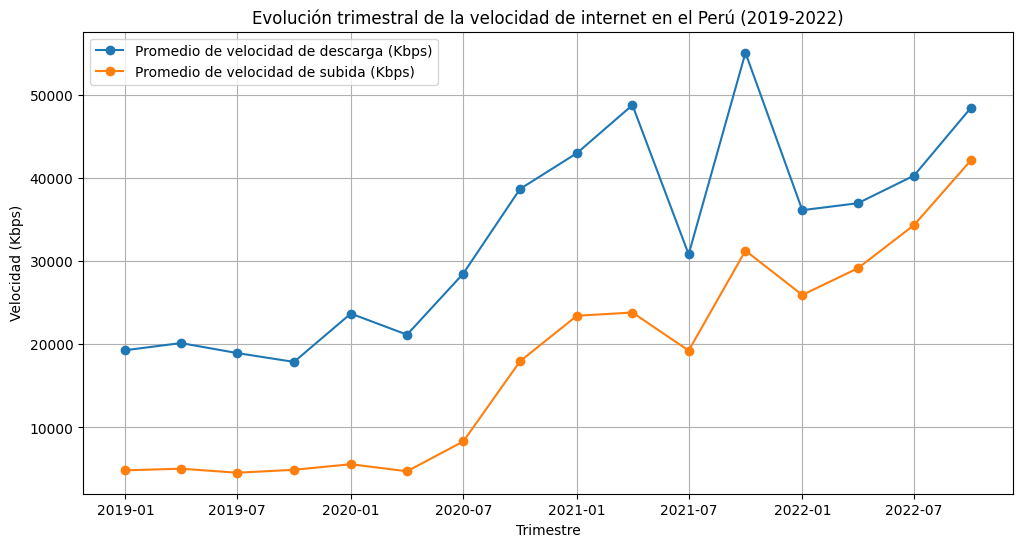

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(stats_by_quarter['Year_Quarter'], stats_by_quarter['Avg_Download_Speed_Kbps'], label='Promedio de velocidad de descarga (Kbps)', marker='o')
plt.plot(stats_by_quarter['Year_Quarter'], stats_by_quarter['Avg_Upload_Speed_Kbps'], label='Promedio de velocidad de subida (Kbps)', marker='o')
plt.xlabel('Trimestre')
plt.ylabel('Velocidad (Kbps)')
plt.title('Evolución trimestral de la velocidad de internet en el Perú (2019-2022)')
plt.legend()
plt.grid(True)
plt.show()

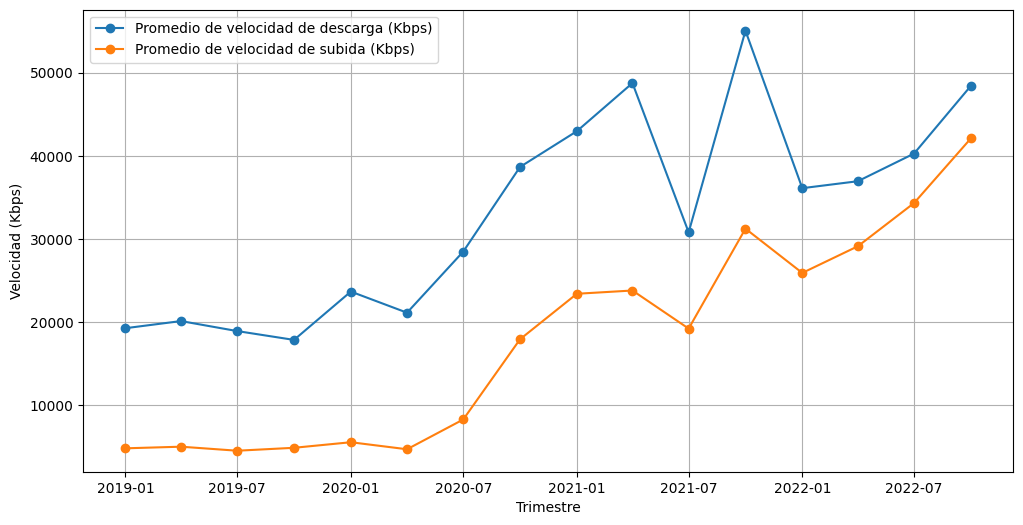

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(stats_by_quarter['Year_Quarter'], stats_by_quarter['Avg_Download_Speed_Kbps'], label='Promedio de velocidad de descarga (Kbps)', marker='o')
plt.plot(stats_by_quarter['Year_Quarter'], stats_by_quarter['Avg_Upload_Speed_Kbps'], label='Promedio de velocidad de subida (Kbps)', marker='o')
plt.xlabel('Trimestre', fontsize=10)
plt.ylabel('Velocidad (Kbps)', fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Guardar el gráfico
plt.savefig('output/grafico_velocidad_internet_peru.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
combined_data.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,index_righ,UBIGEO,CCDD,CCPP,...,DEPARTAMEN,PROVINCIA,DISTRITO,OBJECTID,ESRI_OID,year,quarter,geometry,year_quarter,year_quarter_date
0,2100300121202033,39338,7386,18,478,56,1332,150140,15,01,...,LIMA,LIMA,SANTIAGO DE SURCO,1333.0,1333.0,2019,1,"POLYGON ((-76.97571 -12.09841, -76.97021 -12.0...",2019Q1,2019-01-01
1,2100300121202222,26534,6529,26,171,40,1332,150140,15,01,...,LIMA,LIMA,SANTIAGO DE SURCO,1333.0,1333.0,2019,1,"POLYGON ((-76.99219 -12.11989, -76.98669 -12.1...",2019Q1,2019-01-01
2,2100300120331133,23960,4519,16,225,32,1332,150140,15,01,...,LIMA,LIMA,SANTIAGO DE SURCO,1333.0,1333.0,2019,1,"POLYGON ((-76.99768 -12.14138, -76.99219 -12.1...",2019Q1,2019-01-01
3,2100300120313331,23637,4033,29,235,60,1332,150140,15,01,...,LIMA,LIMA,SANTIAGO DE SURCO,1333.0,1333.0,2019,1,"POLYGON ((-76.99768 -12.11452, -76.99219 -12.1...",2019Q1,2019-01-01
4,2100300121202231,34316,6107,17,255,42,1332,150140,15,01,...,LIMA,LIMA,SANTIAGO DE SURCO,1333.0,1333.0,2019,1,"POLYGON ((-76.97571 -12.11452, -76.97021 -12.1...",2019Q1,2019-01-01


ANALISIS POR DEPARTAMENTO Y AÑO

In [ ]:
stats_by_department_year = combined_data.groupby(['DEPARTAMEN', 'year_quarter']).agg({
    'avg_d_kbps': 'mean',
    'avg_u_kbps': 'mean',
    'tests': 'sum',
    'devices': 'sum'
}).reset_index()

In [ ]:
stats_by_department_year.columns = ['Department', 'Year', 'Avg_Download_Speed_Kbps', 'Avg_Upload_Speed_Kbps', 'Total_Tests', 'Total_Devices']

# Muestra las estadísticas por departamento y año
print(stats_by_department_year)

    Department    Year  Avg_Download_Speed_Kbps  Avg_Upload_Speed_Kbps  \
0     AMAZONAS  2019Q1              5180.833333            3209.208333   
1     AMAZONAS  2019Q2             11375.525000            4890.275000   
2     AMAZONAS  2019Q3             14170.076923            5900.307692   
3     AMAZONAS  2019Q4             14403.131579            6720.131579   
4     AMAZONAS  2020Q1             11072.750000            4777.083333   
..         ...     ...                      ...                    ...   
395    UCAYALI  2021Q4             53549.239437           40200.211268   
396    UCAYALI  2022Q1             35115.465753           26229.489726   
397    UCAYALI  2022Q2             31146.060317           26012.704762   
398    UCAYALI  2022Q3             31749.331288           27342.438650   
399    UCAYALI  2022Q4             35721.050676           30011.604730   

     Total_Tests  Total_Devices  
0            353             53  
1            287             80  
2        

In [ ]:
stats_by_department_year.to_excel('output/stats_by_department_year.xlsx',index = False)

In [ ]:
# Ordena los departamentos por velocidad de descarga
stats_by_department_sorted_download = stats_by_department_year.sort_values(by='Avg_Download_Speed_Kbps', ascending=False)

# Ordena los departamentos por velocidad de subida
stats_by_department_sorted_upload = stats_by_department_year.sort_values(by='Avg_Upload_Speed_Kbps', ascending=False)

# Muestra los 10 departamentos con la mayor velocidad de descarga
print("Top 10 Departamentos por Velocidad de Descarga:")
print(stats_by_department_sorted_download.head(10))

# Muestra los 10 departamentos con la mayor velocidad de subida
print("\nTop 10 Departamentos por Velocidad de Subida:")
print(stats_by_department_sorted_upload.head(10))

Top 10 Departamentos por Velocidad de Descarga:
    Department    Year  Avg_Download_Speed_Kbps  Avg_Upload_Speed_Kbps  \
111     CALLAO  2022Q4             73842.219298           62024.178363   
239       LIMA  2022Q4             70953.156257           61754.958129   
235       LIMA  2021Q4             65253.732130           36719.253715   
107     CALLAO  2021Q4             65076.506787           30212.778281   
110     CALLAO  2022Q3             63760.488372           52217.066860   
363      TACNA  2021Q4             62573.015385           52529.046154   
238       LIMA  2022Q3             62435.936338           54067.816682   
109     CALLAO  2022Q2             61439.196970           45188.512121   
73    AYACUCHO  2021Q2             58635.808989           50462.325843   
233       LIMA  2021Q2             56782.243270           24424.663676   

     Total_Tests  Total_Devices  
111        30091           7916  
239       405994         112768  
235       116774          26520  
1

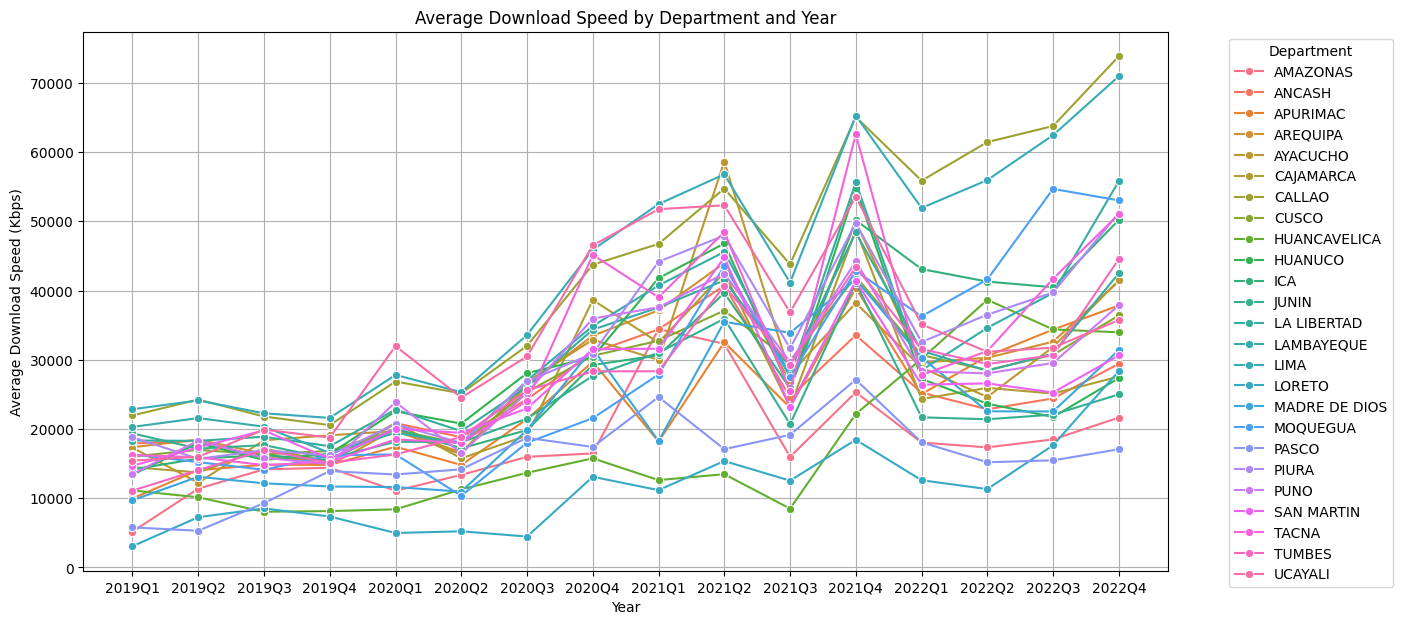

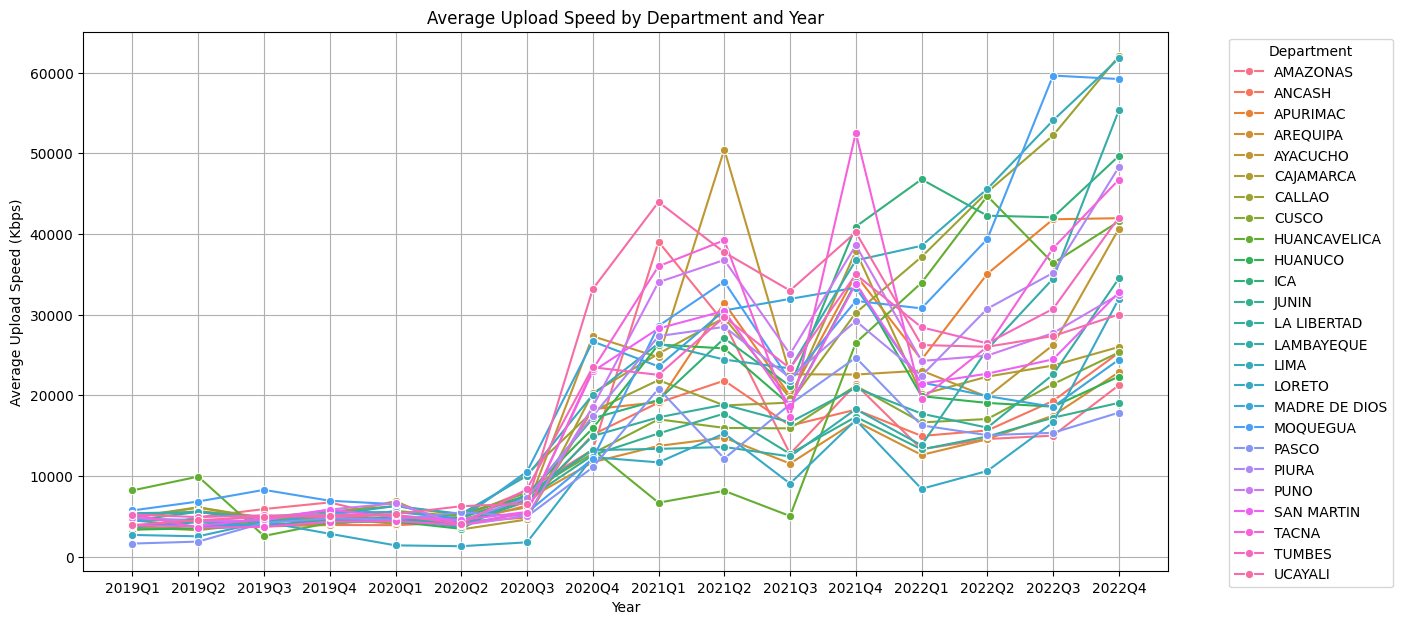

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.lineplot(data=stats_by_department_year, x='Year', y='Avg_Download_Speed_Kbps', hue='Department', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Download Speed (Kbps)')
plt.title('Average Download Speed by Department and Year')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=stats_by_department_year, x='Year', y='Avg_Upload_Speed_Kbps', hue='Department', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Upload Speed (Kbps)')
plt.title('Average Upload Speed by Department and Year')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

ANÁLISIS A NIVEL LIMA METROPOLITANA Y DISTRITAL

In [ ]:
lima_metropolitana_data = combined_data[(combined_data['PROVINCIA'] == 'LIMA') | (combined_data['PROVINCIA'] == 'CALLAO')]

In [ ]:
# Especifica el nombre del archivo de salida (GeoJSON)
lima_data = 'output/lima_metropolitana_data.geojson'

# Guardar el archivo en formato GeoJSON
lima_metropolitana_data.to_file(lima_data, driver='GeoJSON')

print(f"Archivo convertido a GeoJSON y guardado como {lima_metropolitana_data}")

Archivo convertido a GeoJSON y guardado como                  quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0       2100300121202033       39338        7386          18    478       56   
1       2100300121202222       26534        6529          26    171       40   
2       2100300120331133       23960        4519          16    225       32   
3       2100300120313331       23637        4033          29    235       60   
4       2100300121202231       34316        6107          17    255       42   
...                  ...         ...         ...         ...    ...      ...   
153352  2100300123320132       67994      102462           9      1        1   
153353  2100300123320300       82427       88467           6     37        7   
153354  2100300123320301      144832      184148           4      1        1   
153355  2100300123321011       10798        3021          35     24        1   
153356  2100300123321012       33811       11096          22     41        

In [ ]:
lima_metropolitana_data

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,index_righ,UBIGEO,CCDD,CCPP,CCDI,DEPARTAMEN,PROVINCIA,DISTRITO,OBJECTID,ESRI_OID,year,quarter,geometry,year_quarter
0,2100300121202033,39338,7386,18,478,56,1332,150140,15,01,40,LIMA,LIMA,SANTIAGO DE SURCO,1333.0,1333.0,2019,1,"POLYGON ((-76.97571 -12.09841, -76.97021 -12.0...",2019Q1
1,2100300121202222,26534,6529,26,171,40,1332,150140,15,01,40,LIMA,LIMA,SANTIAGO DE SURCO,1333.0,1333.0,2019,1,"POLYGON ((-76.99219 -12.11989, -76.98669 -12.1...",2019Q1
2,2100300120331133,23960,4519,16,225,32,1332,150140,15,01,40,LIMA,LIMA,SANTIAGO DE SURCO,1333.0,1333.0,2019,1,"POLYGON ((-76.99768 -12.14138, -76.99219 -12.1...",2019Q1
3,2100300120313331,23637,4033,29,235,60,1332,150140,15,01,40,LIMA,LIMA,SANTIAGO DE SURCO,1333.0,1333.0,2019,1,"POLYGON ((-76.99768 -12.11452, -76.99219 -12.1...",2019Q1
4,2100300121202231,34316,6107,17,255,42,1332,150140,15,01,40,LIMA,LIMA,SANTIAGO DE SURCO,1333.0,1333.0,2019,1,"POLYGON ((-76.97571 -12.11452, -76.97021 -12.1...",2019Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153352,2100300123320132,67994,102462,9,1,1,1316,150124,15,01,24,LIMA,LIMA,PUCUSANA,1317.0,1317.0,2022,4,"POLYGON ((-76.78345 -12.48485, -76.77795 -12.4...",2022Q4
153353,2100300123320300,82427,88467,6,37,7,1316,150124,15,01,24,LIMA,LIMA,PUCUSANA,1317.0,1317.0,2022,4,"POLYGON ((-76.79443 -12.49021, -76.78894 -12.4...",2022Q4
153354,2100300123320301,144832,184148,4,1,1,1316,150124,15,01,24,LIMA,LIMA,PUCUSANA,1317.0,1317.0,2022,4,"POLYGON ((-76.78894 -12.49021, -76.78345 -12.4...",2022Q4
153355,2100300123321011,10798,3021,35,24,1,1316,150124,15,01,24,LIMA,LIMA,PUCUSANA,1317.0,1317.0,2022,4,"POLYGON ((-76.75598 -12.46876, -76.75049 -12.4...",2022Q4


In [ ]:
lima_metropolitana_data['avg_d_mbps'] = lima_metropolitana_data['avg_d_kbps'] / 1000
lima_metropolitana_data['avg_u_mbps'] = lima_metropolitana_data['avg_u_kbps'] / 1000

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
lima_metropolitana_data.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,index_righ,UBIGEO,CCDD,CCPP,...,PROVINCIA,DISTRITO,OBJECTID,ESRI_OID,year,quarter,geometry,year_quarter,avg_d_mbps,avg_u_mbps
0,2100300121202033,39338,7386,18,478,56,1332,150140,15,01,...,LIMA,SANTIAGO DE SURCO,1333.0,1333.0,2019,1,"POLYGON ((-76.97571 -12.09841, -76.97021 -12.0...",2019Q1,39.338,7.386
1,2100300121202222,26534,6529,26,171,40,1332,150140,15,01,...,LIMA,SANTIAGO DE SURCO,1333.0,1333.0,2019,1,"POLYGON ((-76.99219 -12.11989, -76.98669 -12.1...",2019Q1,26.534,6.529
2,2100300120331133,23960,4519,16,225,32,1332,150140,15,01,...,LIMA,SANTIAGO DE SURCO,1333.0,1333.0,2019,1,"POLYGON ((-76.99768 -12.14138, -76.99219 -12.1...",2019Q1,23.960,4.519
3,2100300120313331,23637,4033,29,235,60,1332,150140,15,01,...,LIMA,SANTIAGO DE SURCO,1333.0,1333.0,2019,1,"POLYGON ((-76.99768 -12.11452, -76.99219 -12.1...",2019Q1,23.637,4.033
4,2100300121202231,34316,6107,17,255,42,1332,150140,15,01,...,LIMA,SANTIAGO DE SURCO,1333.0,1333.0,2019,1,"POLYGON ((-76.97571 -12.11452, -76.97021 -12.1...",2019Q1,34.316,6.107


In [ ]:
statistics = lima_metropolitana_data[['avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms', 'tests', 'devices']].describe()

In [ ]:
lima_metropolitana_data[['quadkey', 'avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms', 'tests', 'devices', 'DISTRITO', 'year', 'quarter', 'year_quarter', 'date']].to_csv('lima_metropolitana_data.csv', index=False)

print("Los datos procesados se han guardado en 'lima_metropolitana_data.csv'")

Los datos procesados se han guardado en 'lima_metropolitana_data.csv'


In [ ]:
lima_metropolitana_data = pd.read_csv('lima_metropolitana_data.csv')

In [ ]:
# Consolidar año y trimestre en una sola columna (year_quarter)
lima_metropolitana_data['year_quarter'] = lima_metropolitana_data['year'].astype(str) + 'Q' + lima_metropolitana_data['quarter'].astype(str)

# Verifica las primeras filas para asegurarte de que la nueva columna se creó correctamente
print(lima_metropolitana_data[['year', 'quarter', 'year_quarter']].head())


   year  quarter year_quarter
0  2019        1       2019Q1
1  2019        1       2019Q1
2  2019        1       2019Q1
3  2019        1       2019Q1
4  2019        1       2019Q1


In [ ]:
# Generar estadísticas descriptivas de las variables principales
eda_summary = lima_metropolitana_data[['avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms', 'tests', 'devices']].describe()

# Mostrar las estadísticas descriptivas
print(eda_summary)

         avg_d_mbps    avg_u_mbps    avg_lat_ms         tests       devices
count  48596.000000  48596.000000  48596.000000  48596.000000  48596.000000
mean      48.232978     27.548818     19.559758     87.044798     20.347127
std       35.545742     33.351016     53.718823    129.451786     28.510380
min        0.035000      0.001000      0.000000      1.000000      1.000000
25%       22.372750      4.950000      9.000000      7.000000      3.000000
50%       36.975000     14.936500     12.000000     33.000000      8.000000
75%       68.635000     33.047000     18.000000    114.000000     26.000000
max      493.191000    340.160000   4929.000000   3729.000000    285.000000


In [ ]:
# Detectar outliers en la velocidad de descarga (percentil 99)
outliers_download = lima_metropolitana_data[lima_metropolitana_data['avg_d_mbps'] > lima_metropolitana_data['avg_d_mbps'].quantile(0.99)]
print(outliers_download[['quadkey', 'avg_d_mbps', 'DISTRITO', 'year_quarter']].head())

# Detectar outliers en la velocidad de carga (percentil 99)
outliers_upload = lima_metropolitana_data[lima_metropolitana_data['avg_u_mbps'] > lima_metropolitana_data['avg_u_mbps'].quantile(0.99)]
print(outliers_upload[['quadkey', 'avg_u_mbps', 'DISTRITO', 'year_quarter']].head())

                quadkey  avg_d_mbps     DISTRITO year_quarter
3458   2100300120301313     148.171   SAN MIGUEL       2019Q2
12042  2100300102320122     206.686        ANCON       2020Q1
12054  2100300102320122     206.686   SANTA ROSA       2020Q1
13414  2100300121200122     164.763          ATE       2020Q1
14039  2100300121200122     164.763  SANTA ANITA       2020Q1
                quadkey  avg_u_mbps                DISTRITO year_quarter
3458   2100300120301313     266.041              SAN MIGUEL       2019Q2
21313  2100300120301313     338.181              SAN MIGUEL       2020Q4
23226  2100300120130211     137.900              LOS OLIVOS       2021Q1
23477  2100300120130211     137.900                   COMAS       2021Q1
23638  2100300121022301     173.604  SAN JUAN DE LURIGANCHO       2021Q1


In [ ]:
# Agrupar por distrito y calcular la media de las velocidades
mean_speeds_by_district = lima_metropolitana_data.groupby('DISTRITO')[['avg_d_mbps', 'avg_u_mbps']].mean().reset_index()

# Mostrar la media de velocidades por distrito
print(mean_speeds_by_district)

                      DISTRITO  avg_d_mbps  avg_u_mbps
0                        ANCON   33.336280   14.769324
1                          ATE   42.304402   24.081148
2                     BARRANCO   63.848739   27.667794
3                   BELLAVISTA   53.441843   27.138545
4                        BREÑA   59.711802   36.331559
5                       CALLAO   46.855959   26.309422
6                   CARABAYLLO   36.108163   23.060770
7   CARMEN DE LA LEGUA REYNOSO   53.421305   34.035021
8                   CHACLACAYO   40.399550   16.263044
9                   CHORRILLOS   55.590105   32.221177
10                 CIENEGUILLA   21.965853   10.871786
11                       COMAS   46.654529   26.390274
12                 EL AGUSTINO   51.449075   32.796446
13               INDEPENDENCIA   52.977211   32.079298
14                 JESUS MARIA   63.353599   38.581469
15                   LA MOLINA   71.076982   41.769347
16                    LA PERLA   55.617351   32.974668
17        

In [ ]:
# Estadísticas descriptivas del número de tests por grilla
tests_summary = lima_metropolitana_data['tests'].describe()

# Mostrar estadísticas descriptivas de los tests
print(tests_summary)

count    48596.000000
mean        87.044798
std        129.451786
min          1.000000
25%          7.000000
50%         33.000000
75%        114.000000
max       3729.000000
Name: tests, dtype: float64


In [ ]:

# Función para convertir year_quarter en formato de fecha
def convert_to_date(row):
    quarter_start_month = {
        1: "01",  # Q1 -> Enero
        2: "04",  # Q2 -> Abril
        3: "07",  # Q3 -> Julio
        4: "10"   # Q4 -> Octubre
    }
    # Crear la fecha en formato yyyy-mm-dd, el día siempre será 01
    return f"{row['year']}-{quarter_start_month[row['quarter']]}-01"

# Aplicar la función para convertir la columna 'year_quarter' en un formato de fecha
lima_metropolitana_data['date'] = lima_metropolitana_data.apply(convert_to_date, axis=1)

# Verificar las primeras filas con la nueva columna de fechas
print(lima_metropolitana_data[['year_quarter', 'date']].head())

  year_quarter        date
0       2019Q1  2019-01-01
1       2019Q1  2019-01-01
2       2019Q1  2019-01-01
3       2019Q1  2019-01-01
4       2019Q1  2019-01-01


In [ ]:
lima_metropolitana_data

,quadkey,avg_d_mbps,avg_u_mbps,avg_lat_ms,tests,devices,DISTRITO,year,quarter,year_quarter,date
0,2100300121202033,39.338,7.386,18,478,56,SANTIAGO DE SURCO,2019,1,2019Q1,2019-01-01
1,2100300121202222,26.534,6.529,26,171,40,SANTIAGO DE SURCO,2019,1,2019Q1,2019-01-01
2,2100300120331133,23.960,4.519,16,225,32,SANTIAGO DE SURCO,2019,1,2019Q1,2019-01-01
3,2100300120313331,23.637,4.033,29,235,60,SANTIAGO DE SURCO,2019,1,2019Q1,2019-01-01
4,2100300121202231,34.316,6.107,17,255,42,SANTIAGO DE SURCO,2019,1,2019Q1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...
48591,2100300123320132,67.994,102.462,9,1,1,PUCUSANA,2022,4,2022Q4,2022-10-01
48592,2100300123320300,82.427,88.467,6,37,7,PUCUSANA,2022,4,2022Q4,2022-10-01
48593,2100300123320301,144.832,184.148,4,1,1,PUCUSANA,2022,4,2022Q4,2022-10-01
48594,2100300123321011,10.798,3.021,35,24,1,PUCUSANA,2022,4,2022Q4,2022-10-01


In [ ]:
lima_metropolitana_data['date'] = pd.PeriodIndex(lima_metropolitana_data['date'], freq='Q')

In [ ]:
unique_quadkeys = lima_metropolitana_data['quadkey'].unique()
all_dates = pd.period_range('2019Q1', '2022Q4', freq='Q')

In [ ]:
# Crear un DataFrame con todas las combinaciones posibles de 'quadkey' y 'date'
all_combinations = pd.MultiIndex.from_product([unique_quadkeys, all_dates], names=['quadkey', 'date']).to_frame(index=False)
all_combinations

,quadkey,date
0,2100300121202033,2019Q1
1,2100300121202033,2019Q2
2,2100300121202033,2019Q3
3,2100300121202033,2019Q4
4,2100300121202033,2020Q1
...,...,...
54459,2100300123320132,2021Q4
54460,2100300123320132,2022Q1
54461,2100300123320132,2022Q2
54462,2100300123320132,2022Q3


In [ ]:
# Paso 3: Identificar las combinaciones presentes en los datos
observed_combinations = lima_metropolitana_data[['quadkey', 'date']].drop_duplicates()
observed_combinations

,quadkey,date
0,2100300121202033,2019Q1
1,2100300121202222,2019Q1
2,2100300120331133,2019Q1
3,2100300120313331,2019Q1
4,2100300121202231,2019Q1
...,...,...
48591,2100300123320132,2022Q4
48592,2100300123320300,2022Q4
48593,2100300123320301,2022Q4
48594,2100300123321011,2022Q4


In [ ]:
# Realizar un 'outer join' para encontrar las combinaciones faltantes
missing_combinations = pd.merge(all_combinations, observed_combinations, on=['quadkey', 'date'], how='left', indicator=True)

In [ ]:
# Filtrar las combinaciones que no están presentes en los datos originales
missing_data = missing_combinations[missing_combinations['_merge'] == 'left_only']

In [ ]:
# Paso 4: Contar cuántas combinaciones faltan
missing_count = len(missing_data)

In [ ]:
# Imprimir el resultado
print(f"Número de combinaciones de 'quadkey' y 'date' faltantes: {missing_count}")

# Verificar si el panel está balanceado
is_balanced = missing_count == 0
print(f"El panel está balanceado: {is_balanced}")

Número de combinaciones de 'quadkey' y 'date' faltantes: 17552
El panel está balanceado: False


In [ ]:
# Paso 1: Asegurarnos de que la columna 'date' esté en formato de periodo trimestral
lima_metropolitana_data['date'] = pd.PeriodIndex(lima_metropolitana_data['date'], freq='Q')

# Paso 2: Contar cuántas observaciones tiene cada 'quadkey' en el rango completo de trimestres
periodo_completo = pd.period_range('2019Q1', '2022Q4', freq='Q')
observaciones_por_quadkey = lima_metropolitana_data.groupby('quadkey')['date'].nunique()

# Paso 3: Filtrar los 'quadkey' que tienen observaciones en todos los trimestres
quadkeys_completos = observaciones_por_quadkey[observaciones_por_quadkey == len(periodo_completo)].index

# Paso 4: Filtrar el DataFrame original para quedarnos solo con esos 'quadkey'
lima_metropolitana_data_filtrado = lima_metropolitana_data[lima_metropolitana_data['quadkey'].isin(quadkeys_completos)]

# Mostrar el número de observaciones después del filtrado
print(f"Número de observaciones tras filtrar los 'quadkey' completos: {len(lima_metropolitana_data_filtrado)}")

# (Opcional) Guardar el nuevo conjunto de datos en un archivo CSV
# lima_metropolitana_data_filtrado.to_csv('lima_metropolitana_data_filtrado.csv', index=False)

Número de observaciones tras filtrar los 'quadkey' completos: 29264


In [ ]:
def verificar_balanceado(df, id_col, time_col, start_period, end_period, freq='Q'):
    """
    Verifica si un panel de datos está balanceado.

    :param df: DataFrame con los datos a verificar.
    :param id_col: Nombre de la columna que identifica las entidades (ej. 'quadkey').
    :param time_col: Nombre de la columna que contiene el tiempo (ej. 'date').
    :param start_period: Periodo inicial en formato 'YYYYQX' (ej. '2019Q1').
    :param end_period: Periodo final en formato 'YYYYQX' (ej. '2022Q4').
    :param freq: Frecuencia del periodo, por defecto 'Q' (trimestral).
    :return: True si el panel está balanceado, False si no lo está.
    """
    # Asegurarnos de que la columna de tiempo esté en formato de periodo
    df[time_col] = pd.PeriodIndex(df[time_col], freq=freq)

    # Generar todas las combinaciones posibles de identificador y tiempo
    unique_ids = df[id_col].unique()
    all_periods = pd.period_range(start_period, end_period, freq=freq)

    # Crear un DataFrame con todas las combinaciones posibles de id_col y time_col
    all_combinations = pd.MultiIndex.from_product([unique_ids, all_periods], names=[id_col, time_col]).to_frame(index=False)

    # Identificar las combinaciones presentes en los datos
    observed_combinations = df[[id_col, time_col]].drop_duplicates()

    # Realizar un 'outer join' para encontrar las combinaciones faltantes
    missing_combinations = pd.merge(all_combinations, observed_combinations, on=[id_col, time_col], how='left', indicator=True)

    # Filtrar las combinaciones que no están presentes en los datos originales
    missing_data = missing_combinations[missing_combinations['_merge'] == 'left_only']

    # Contar cuántas combinaciones faltan
    missing_count = len(missing_data)

    # Verificar si el panel está balanceado
    is_balanced = missing_count == 0
    return is_balanced, missing_count

# Ejemplo de uso
is_balanced, missing_count = verificar_balanceado(lima_metropolitana_data_filtrado, 'quadkey', 'date', '2019Q1', '2022Q4')
print(f"El panel está balanceado: {is_balanced}")
print(f"Número de combinaciones faltantes: {missing_count}")

El panel está balanceado: True
Número de combinaciones faltantes: 0


<ipython-input-25-441b1e4b7303>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[time_col] = pd.PeriodIndex(df[time_col], freq=freq)


In [ ]:
lima_metropolitana_data_filtrado.reset_index(drop=True, inplace=True)

In [ ]:
lima_metropolitana_data_filtrado

,quadkey,avg_d_mbps,avg_u_mbps,avg_lat_ms,tests,devices,DISTRITO,year,quarter,year_quarter,date
0,2100300121202033,39.338,7.386,18,478,56,SANTIAGO DE SURCO,2019,1,2019Q1,2019Q1
1,2100300121202222,26.534,6.529,26,171,40,SANTIAGO DE SURCO,2019,1,2019Q1,2019Q1
2,2100300120331133,23.960,4.519,16,225,32,SANTIAGO DE SURCO,2019,1,2019Q1,2019Q1
3,2100300120313331,23.637,4.033,29,235,60,SANTIAGO DE SURCO,2019,1,2019Q1,2019Q1
4,2100300121202231,34.316,6.107,17,255,42,SANTIAGO DE SURCO,2019,1,2019Q1,2019Q1
...,...,...,...,...,...,...,...,...,...,...,...
29259,2100300123300133,87.799,26.176,11,35,18,SANTA MARIA DEL MAR,2022,4,2022Q4,2022Q4
29260,2100300123300311,77.199,23.469,11,17,5,SANTA MARIA DEL MAR,2022,4,2022Q4,2022Q4
29261,2100300123300312,81.842,24.423,11,21,7,SANTA MARIA DEL MAR,2022,4,2022Q4,2022Q4
29262,2100300123300313,59.019,24.519,9,9,5,SANTA MARIA DEL MAR,2022,4,2022Q4,2022Q4


In [ ]:
# Contar la cantidad de quadkeys únicos en el dataset
num_quadkeys_unicos = lima_metropolitana_data_filtrado['quadkey'].nunique()

# Mostrar el número de quadkeys únicos
print(f"Número de quadkeys únicos: {num_quadkeys_unicos}")

Número de quadkeys únicos: 1326


In [ ]:
distritos_unicos = lima_metropolitana_data['DISTRITO'].unique()
print("Distritos únicos en el DataFrame:")
print(distritos_unicos)

Distritos únicos en el DataFrame:
['SANTIAGO DE SURCO' 'CALLAO' 'SAN MARTIN DE PORRES' 'SAN BORJA'
 'JESUS MARIA' 'LIMA' 'SAN ISIDRO' 'LINCE' 'VENTANILLA' 'PUENTE PIEDRA'
 'MIRAFLORES' 'SURQUILLO' 'SAN JUAN DE LURIGANCHO' 'INDEPENDENCIA'
 'LOS OLIVOS' 'CHORRILLOS' 'LA VICTORIA' 'SAN LUIS' 'PUEBLO LIBRE' 'BREÑA'
 'ATE' 'MAGDALENA DEL MAR' 'LA MOLINA' 'SAN MIGUEL' 'BELLAVISTA'
 'EL AGUSTINO' 'COMAS' 'BARRANCO' 'SAN JUAN DE MIRAFLORES'
 'VILLA EL SALVADOR' 'LA PERLA' 'SANTA ANITA' 'SANTA MARIA DEL MAR'
 'SAN BARTOLO' 'CARABAYLLO' 'PUNTA NEGRA' 'RIMAC' 'LURIGANCHO'
 'CHACLACAYO' 'LURIN' 'PACHACAMAC' 'VILLA MARIA DEL TRIUNFO'
 'PUNTA HERMOSA' 'CARMEN DE LA LEGUA REYNOSO' 'CIENEGUILLA' 'LA PUNTA'
 'ANCON' 'PUCUSANA' 'MI PERU' 'SANTA ROSA']


In [ ]:
# Contar la cantidad de quadkeys únicos por cada distrito
quadkeys_por_distrito = lima_metropolitana_data_filtrado.groupby('DISTRITO')['quadkey'].nunique()

# Mostrar el número de quadkeys únicos por distrito
print(quadkeys_por_distrito)


DISTRITO
ANCON                           4
ATE                            91
BARRANCO                       15
BELLAVISTA                     25
BREÑA                          18
CALLAO                         74
CARABAYLLO                     22
CARMEN DE LA LEGUA REYNOSO      9
CHACLACAYO                     25
CHORRILLOS                     72
CIENEGUILLA                     7
COMAS                          66
EL AGUSTINO                    43
INDEPENDENCIA                  30
JESUS MARIA                    22
LA MOLINA                      99
LA PERLA                       16
LA PUNTA                        3
LA VICTORIA                    38
LIMA                           89
LINCE                          16
LOS OLIVOS                     66
LURIGANCHO                     34
LURIN                          17
MAGDALENA DEL MAR              18
MI PERU                         3
MIRAFLORES                     44
PACHACAMAC                     10
PUCUSANA                        1
PUEBL

In [ ]:
lima_metropolitana_data_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29264 entries, 0 to 29263
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype        
---  ------        --------------  -----        
 0   quadkey       29264 non-null  int64        
 1   avg_d_mbps    29264 non-null  float64      
 2   avg_u_mbps    29264 non-null  float64      
 3   avg_lat_ms    29264 non-null  int64        
 4   tests         29264 non-null  int64        
 5   devices       29264 non-null  int64        
 6   DISTRITO      29264 non-null  object       
 7   year          29264 non-null  int64        
 8   quarter       29264 non-null  int64        
 9   year_quarter  29264 non-null  object       
 10  date          29264 non-null  period[Q-DEC]
dtypes: float64(2), int64(6), object(2), period[Q-DEC](1)
memory usage: 2.5+ MB


In [ ]:
fechas_win = pd.DataFrame({
    'Fecha_Entrada': ['2019Q3', '2019Q3', '2020Q3', '2020Q3', '2020Q3', '2020Q4', '2020Q4', '2020Q4',
             '2020Q4', '2020Q4', '2020Q4', '2020Q4', '2020Q4', '2021Q1', '2021Q1', '2021Q1',
             '2021Q1', '2021Q1', '2021Q1', '2021Q1', '2021Q1', '2021Q1', '2021Q2', '2021Q2',
             '2021Q2', '2021Q2', '2021Q2', '2021Q2', '2021Q3', '2021Q3', '2021Q3', '2021Q4'],
    'DISTRITO': ['SAN MIGUEL', 'PUEBLO LIBRE', 'JESUS MARIA', 'MAGADALENA DEL MAR', 'SURQUILLO',
                 'SAN ISIDRO', 'MIRAFLORES', 'SANTIAGO DE SURCO', 'LA MOLINA', 'CHORRILLOS',
                 'EL AGUSTINO', 'SAN JUAN DE LURIGANCHO', 'SAN MARTIN DE PORRES', 'SAN BORJA',
                 'BREÑA', 'LA VICTORIA', 'BARRANCO', 'LINCE', 'LIMA', 'INDEPENDENCIA',
                 'RIMAC', 'CHORRILLOS', 'ATE', 'VILLA EL SALVADOR', 'COMAS', 'LOS OLIVOS',
                 'CARABAYLLO', 'PUENTE PIEDRA', 'LA VICTORIA', 'SANTA ANITA', 'SAN LUIS',
                 'LURIGANCHO']
})

# Asegurar que la columna 'date' esté en formato de periodo trimestral
fechas_win['Fecha_Entrada'] = pd.PeriodIndex(fechas_win['Fecha_Entrada'], freq='Q')

In [ ]:
fechas_win

,Fecha_Entrada,DISTRITO
0,2019Q3,SAN MIGUEL
1,2019Q3,PUEBLO LIBRE
2,2020Q3,JESUS MARIA
3,2020Q3,MAGADALENA DEL MAR
4,2020Q3,SURQUILLO
5,2020Q4,SAN ISIDRO
6,2020Q4,MIRAFLORES
7,2020Q4,SANTIAGO DE SURCO
8,2020Q4,LA MOLINA
9,2020Q4,CHORRILLOS


In [ ]:
fechas_win['Fecha_Entrada'] = pd.PeriodIndex(fechas_win['Fecha_Entrada'], freq='Q')
lima_metropolitana_data_filtrado['date'] = pd.PeriodIndex(lima_metropolitana_data_filtrado['date'], freq='Q')

<ipython-input-32-feff185d9a2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lima_metropolitana_data_filtrado['date'] = pd.PeriodIndex(lima_metropolitana_data_filtrado['date'], freq='Q')


In [ ]:
lima_metropolitana_data_filtrado = pd.merge(lima_metropolitana_data_filtrado, fechas_win, on='DISTRITO', how='left')

In [ ]:
lima_metropolitana_data_filtrado['post'] = (lima_metropolitana_data_filtrado['date'] >= lima_metropolitana_data_filtrado['Fecha_Entrada']).astype(int)

# lima_data_balanceado

In [ ]:
lima_metropolitana_data_filtrado.to_csv('lima_metropolitana_data_filtrado.csv')

In [ ]:
import numpy as np

In [ ]:
import numpy as np
from numpy import ndarray

In [ ]:
# Contar la cantidad de observaciones por cada combinación de quadkey y date
obs_counts = lima_metropolitana_data.groupby(['quadkey', 'date']).size().reset_index(name='counts')

# Verificar cuántos quadkeys y fechas únicas existen
unique_quadkeys = lima_metropolitana_data['quadkey'].nunique()
unique_dates = lima_metropolitana_data['date'].nunique()

# Calcular el número esperado de observaciones si el panel estuviera completamente balanceado
expected_obs = unique_quadkeys * unique_dates
actual_obs = len(obs_counts)

# El panel está balanceado si el número de observaciones es igual al número esperado
is_balanced = expected_obs == actual_obs

# Imprimir el resultado
print("El panel está balanceado:", is_balanced)


El panel está balanceado: False


In [ ]:
# Generar todas las combinaciones posibles de quadkey y date
unique_quadkeys = lima_metropolitana_data['quadkey'].unique()
unique_dates = lima_metropolitana_data['date'].unique()

# Crear un DataFrame con todas las combinaciones posibles de quadkey y date
all_combinations = pd.MultiIndex.from_product([unique_quadkeys, unique_dates], names=['quadkey', 'date']).to_frame(index=False)

# Identificar las combinaciones presentes en los datos
observed_combinations = lima_metropolitana_data[['quadkey', 'date']].drop_duplicates()

# Realizar un 'outer join' para encontrar las combinaciones faltantes
missing_combinations = pd.merge(all_combinations, observed_combinations, on=['quadkey', 'date'], how='left', indicator=True)

# Filtrar las combinaciones que no están presentes en los datos originales
missing_data = missing_combinations[missing_combinations['_merge'] == 'left_only']

# Contar cuántas combinaciones faltan
missing_count = len(missing_data)

# Imprimir el resultado
print(f"Número de combinaciones de 'quadkey' y 'date' faltantes: {missing_count}")

Número de combinaciones de 'quadkey' y 'date' faltantes: 17552


# Lima Análisis

In [ ]:
grouped_data.to_excel('output/estadisticas_descriptivas.xlsx', index=False)

In [ ]:
stats_by_district = lima_metropolitana_data.groupby(['DISTRITO', 'year_quarter']).agg({
    'avg_d_kbps': 'mean',
    'avg_u_kbps': 'mean',
    'tests': 'sum',
    'devices': 'sum'
}).reset_index()

In [ ]:
stats_by_district

,DISTRITO,year_quarter,avg_d_kbps,avg_u_kbps,tests,devices
0,ANCON,2019Q1,20368.555556,4543.481481,174,51
1,ANCON,2019Q2,16747.954545,12830.000000,99,38
2,ANCON,2019Q3,15343.358974,6242.589744,511,157
3,ANCON,2019Q4,13453.830189,7338.547170,1146,264
4,ANCON,2020Q1,29480.695652,7173.826087,186,50
...,...,...,...,...,...,...
795,VILLA MARIA DEL TRIUNFO,2021Q4,62892.319588,31928.453608,2237,405
796,VILLA MARIA DEL TRIUNFO,2022Q1,58968.847328,42064.045802,12246,2700
797,VILLA MARIA DEL TRIUNFO,2022Q2,63593.121212,49607.772727,12750,3052
798,VILLA MARIA DEL TRIUNFO,2022Q3,68203.656489,55841.435115,11826,3010


<ipython-input-20-8955ad34debd>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=stats_by_district, x='year_quarter', y='Avg_Download_Speed_Kbps', hue='District', marker='o', ci=None)


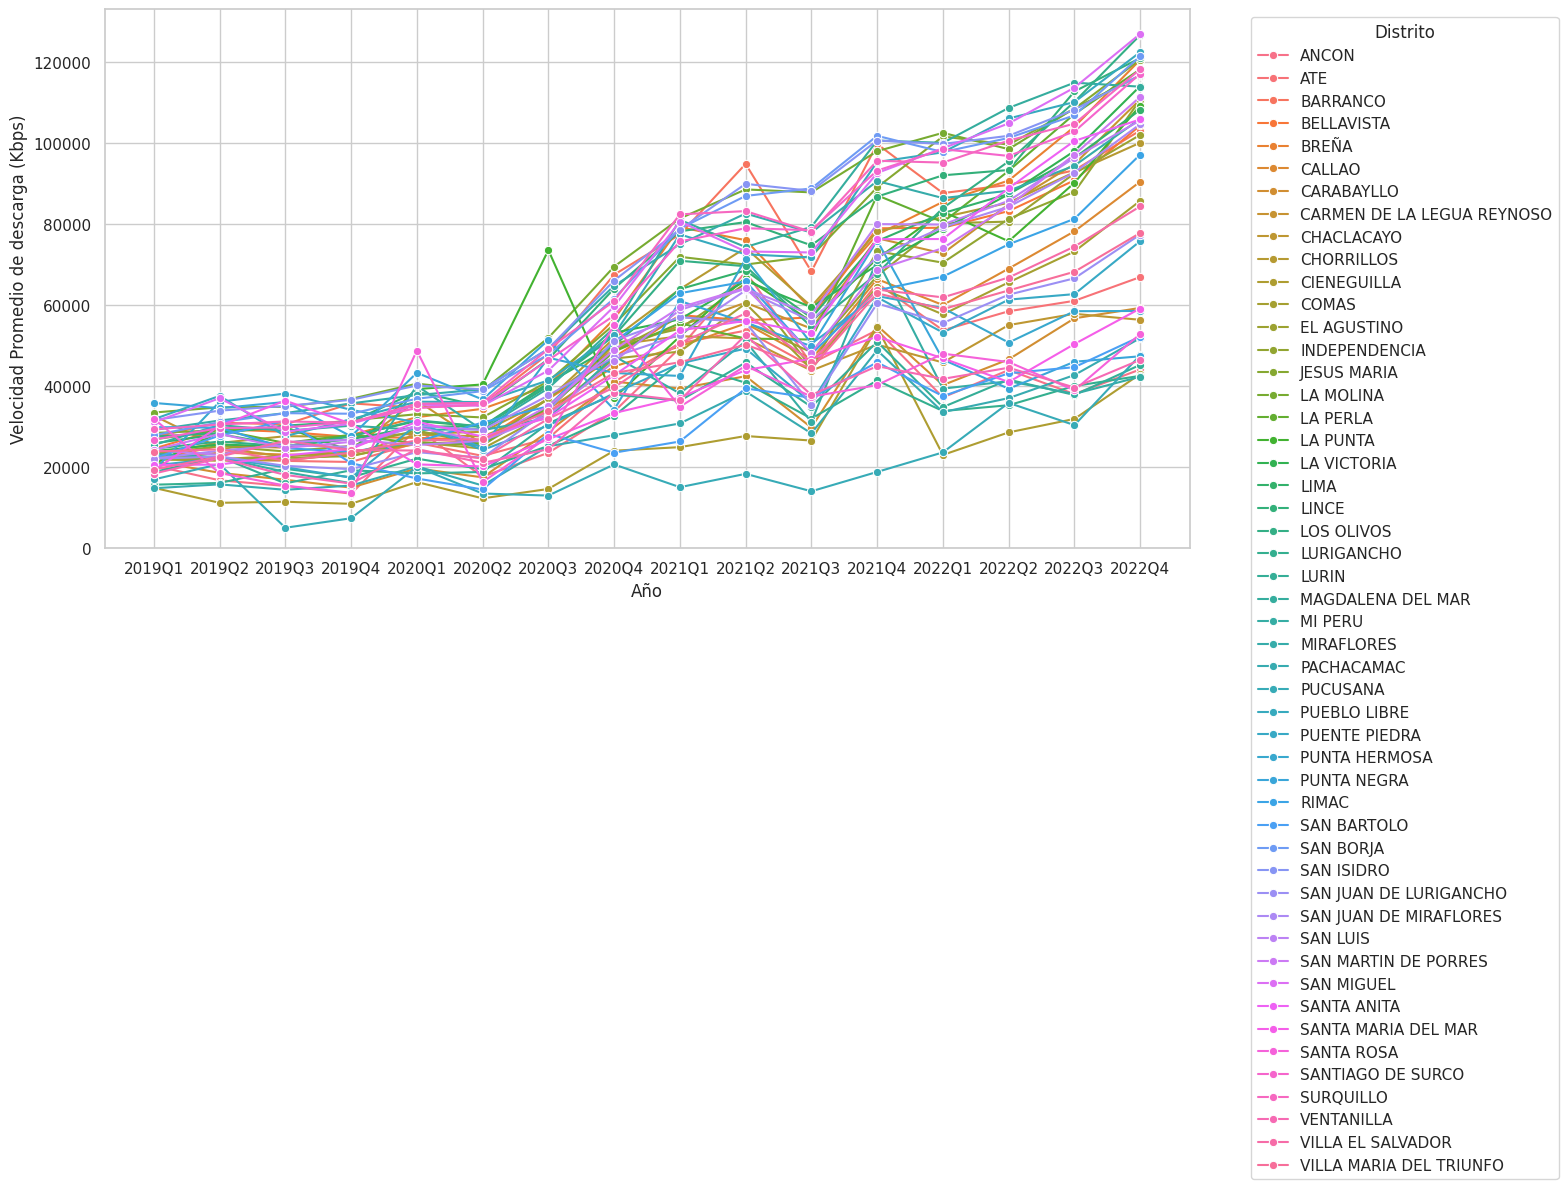

In [ ]:
stats_by_district.columns = ['District', 'year_quarter', 'Avg_Download_Speed_Kbps', 'Avg_Upload_Speed_Kbps', 'Total_Tests', 'Total_Devices']

# Visualiza la evolución de las velocidades de descarga y subida por distrito y trimestre
import seaborn as sns
import matplotlib.pyplot as plt


# Desactivar el suavizado y ajustar los marcadores
sns.set(style="whitegrid")  # Esto establece un fondo blanco con cuadrícula
plt.figure(figsize=(14, 7))

# Gráfico de velocidades de descarga por distrito
sns.lineplot(data=stats_by_district, x='year_quarter', y='Avg_Download_Speed_Kbps', hue='District', marker='o', ci=None)
plt.xlabel('Año')
plt.ylabel('Velocidad Promedio de descarga (Kbps)')
plt.legend(title='Distrito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.ylim(bottom=0)  # Ajusta el límite inferior del eje y si es necesario
plt.savefig('output/grafico_velocidad_internet_lima.png', dpi=300, bbox_inches='tight')
plt.show()


<ipython-input-29-ed951c378e9a>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=stats_by_district, x='year_quarter', y='Avg_Upload_Speed_Kbps', hue='District', marker='o', ci=None)


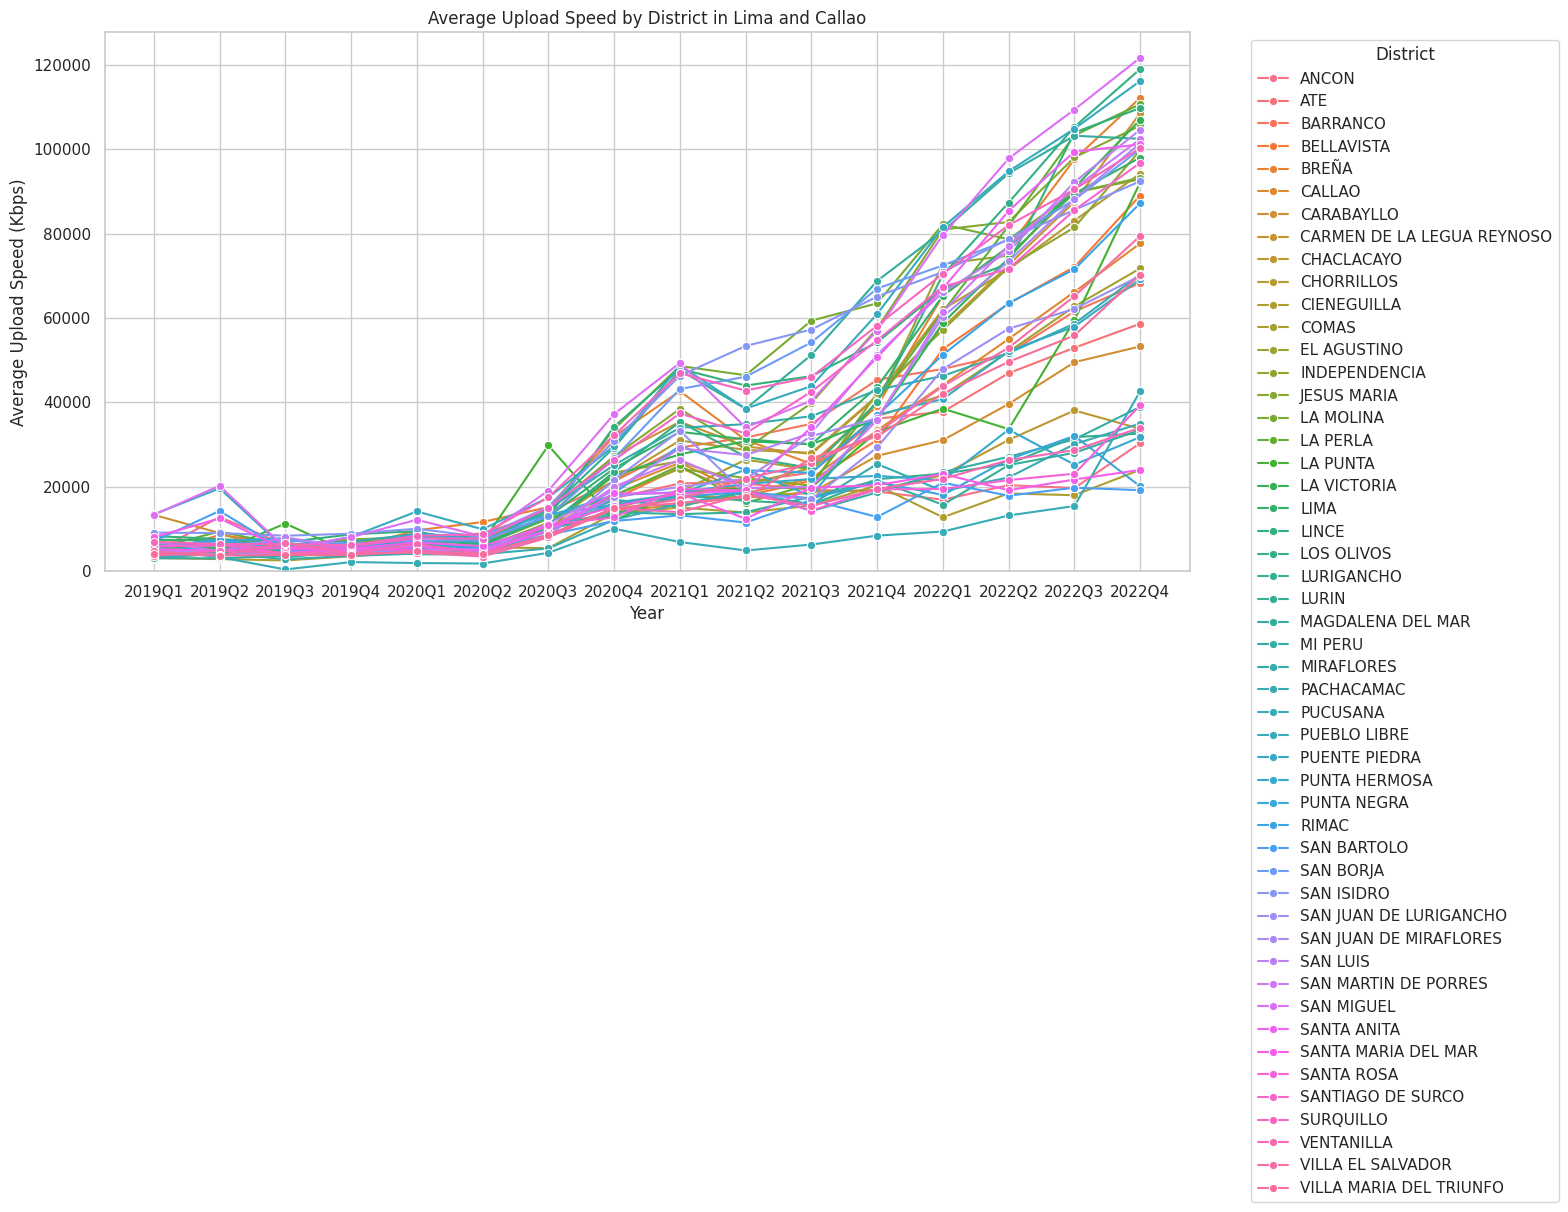

In [ ]:

# Gráfico de velocidades de subida por distrito
plt.figure(figsize=(14, 7))
sns.lineplot(data=stats_by_district, x='year_quarter', y='Avg_Upload_Speed_Kbps', hue='District', marker='o', ci=None)
plt.xlabel('Year')
plt.ylabel('Average Upload Speed (Kbps)')
plt.title('Average Upload Speed by District in Lima and Callao')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.ylim(bottom=0)  # Ajusta el límite inferior del eje y si es necesario
plt.show()

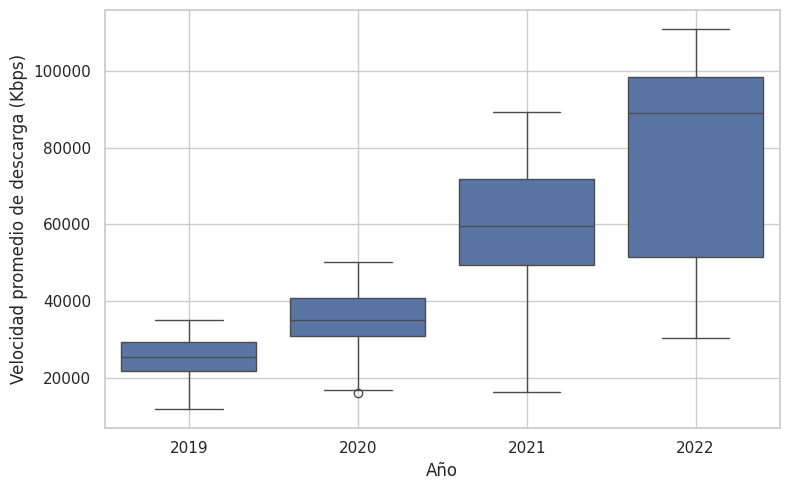

In [ ]:
stats_by_district_year = lima_metropolitana_data.groupby(['DISTRITO', 'year']).agg({
    'avg_d_kbps': 'mean',
    'avg_u_kbps': 'mean',
    'tests': 'sum',
    'devices': 'sum'
}).reset_index()

# Renombra las columnas para mayor claridad
stats_by_district_year.columns = ['District', 'Year', 'Avg_Download_Speed_Kbps', 'Avg_Upload_Speed_Kbps', 'Total_Tests', 'Total_Devices']

# Calcula el promedio general y la desviación estándar de las velocidades de descarga y subida
overall_avg_download_speed = stats_by_district_year['Avg_Download_Speed_Kbps'].mean()
overall_avg_upload_speed = stats_by_district_year['Avg_Upload_Speed_Kbps'].mean()

plt.rcParams.update({'font.size': 10})

# Crear y configurar el gráfico
plt.figure(figsize=(8, 5))  # Tamaño del gráfico en pulgadas (ancho, alto)

sns.boxplot(data=stats_by_district_year, x='Year', y='Avg_Download_Speed_Kbps')
plt.xlabel('Año')
plt.ylabel('Velocidad promedio de descarga (Kbps)')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()  # Ajusta automáticamente los márgenes para evitar recortes
plt.savefig('output/grafico_velocidad_internet_lima.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
grouped_data = lima_metropolitana_data.groupby(['DISTRITO', 'year', 'quarter']).agg({
    'avg_d_kbps': ['mean', 'std', 'min', 'max', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)],
    'avg_u_kbps': ['mean', 'std', 'min', 'max', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)]
}).reset_index()

# Renombrar columnas para mayor claridad
grouped_data.columns = ['District', 'Year', 'Quarter',
                        'Avg_Download_Speed_Mean', 'Avg_Download_Speed_Std', 'Avg_Download_Speed_Min', 'Avg_Download_Speed_Max', 'Avg_Download_Speed_25%', 'Avg_Download_Speed_50%', 'Avg_Download_Speed_75%',
                        'Avg_Upload_Speed_Mean', 'Avg_Upload_Speed_Std', 'Avg_Upload_Speed_Min', 'Avg_Upload_Speed_Max', 'Avg_Upload_Speed_25%', 'Avg_Upload_Speed_50%', 'Avg_Upload_Speed_75%']

# Visualizar algunas estadísticas descriptivas
grouped_data.head()

,District,Year,Quarter,Avg_Download_Speed_Mean,Avg_Download_Speed_Std,Avg_Download_Speed_Min,Avg_Download_Speed_Max,Avg_Download_Speed_25%,Avg_Download_Speed_50%,Avg_Download_Speed_75%,Avg_Upload_Speed_Mean,Avg_Upload_Speed_Std,Avg_Upload_Speed_Min,Avg_Upload_Speed_Max,Avg_Upload_Speed_25%,Avg_Upload_Speed_50%,Avg_Upload_Speed_75%
0,ANCON,2019,1,20368.555556,17065.214142,1435,65592,8322.50,11976.0,31064.0,4543.481481,2804.042581,531,12708,2692.50,4240.0,5942.00
1,ANCON,2019,2,16747.954545,9187.568710,1441,35719,11705.75,14457.5,20959.0,12830.000000,19091.380014,767,55805,1383.25,3115.0,10045.75
2,ANCON,2019,3,15343.358974,10468.576786,827,36580,6253.50,13303.0,23406.0,6242.589744,7661.019428,640,42243,3409.00,4050.0,5261.50
3,ANCON,2019,4,13453.830189,7812.763666,881,36177,5505.00,14374.0,19070.0,7338.547170,9616.842846,68,56764,3461.00,4543.0,6412.00
4,ANCON,2020,1,29480.695652,46070.171227,971,206686,4831.50,23006.0,30756.0,7173.826087,7904.297845,286,37456,2230.00,5821.0,9495.00


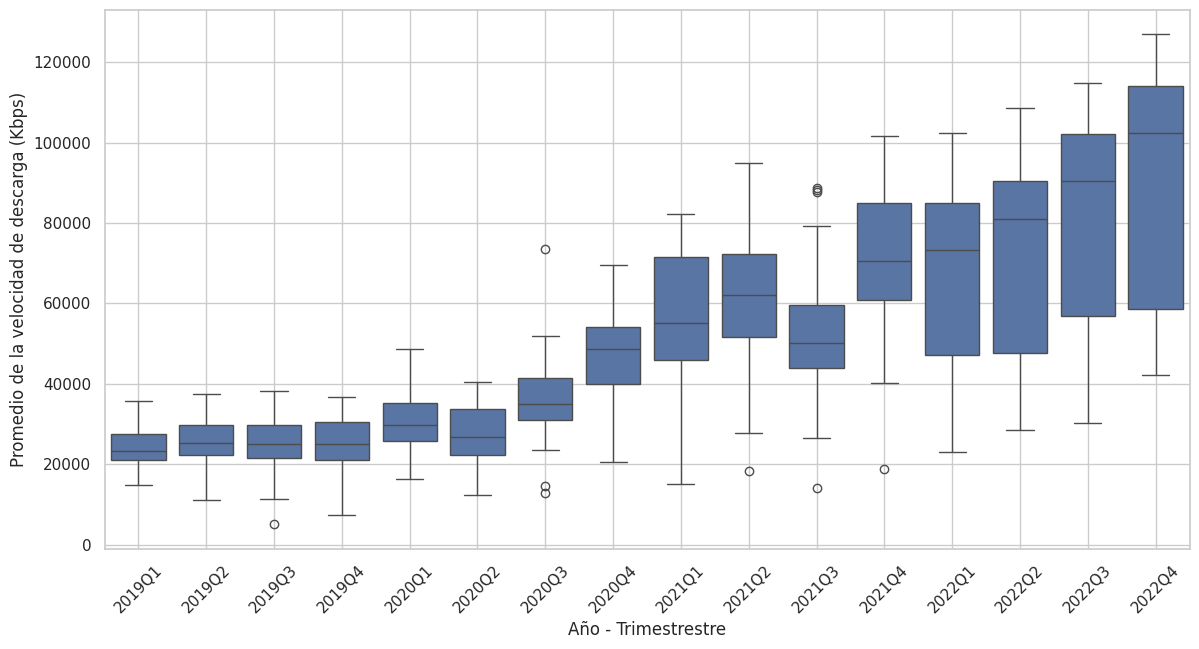

In [ ]:
# Convertir el trimestre y el año en una sola columna de fecha
grouped_data['Year_Quarter'] = grouped_data['Year'].astype(str) + 'Q' + grouped_data['Quarter'].astype(str)

# Crear gráficos de cajas para velocidades de descarga y subida
plt.figure(figsize=(14, 7))
sns.boxplot(data=grouped_data, x='Year_Quarter', y='Avg_Download_Speed_Mean')
plt.xlabel('Año - Trimestrestre')
plt.ylabel('Promedio de la velocidad de descarga (Kbps)')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('output/grafico_distribucion_velocidad_internet_lima.png', dpi=300, bbox_inches='tight')
plt.show()

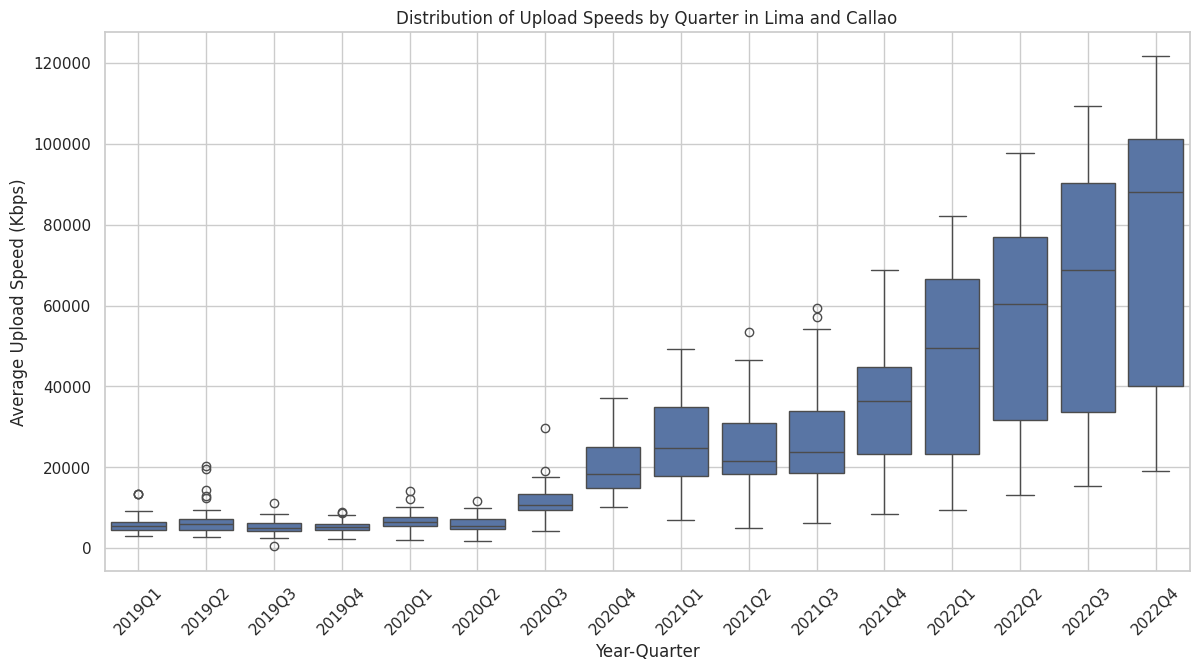

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=grouped_data, x='Year_Quarter', y='Avg_Upload_Speed_Mean')
plt.xlabel('Year-Quarter')
plt.ylabel('Average Upload Speed (Kbps)')
plt.title('Distribution of Upload Speeds by Quarter in Lima and Callao')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Análisis de Lima metropolitana

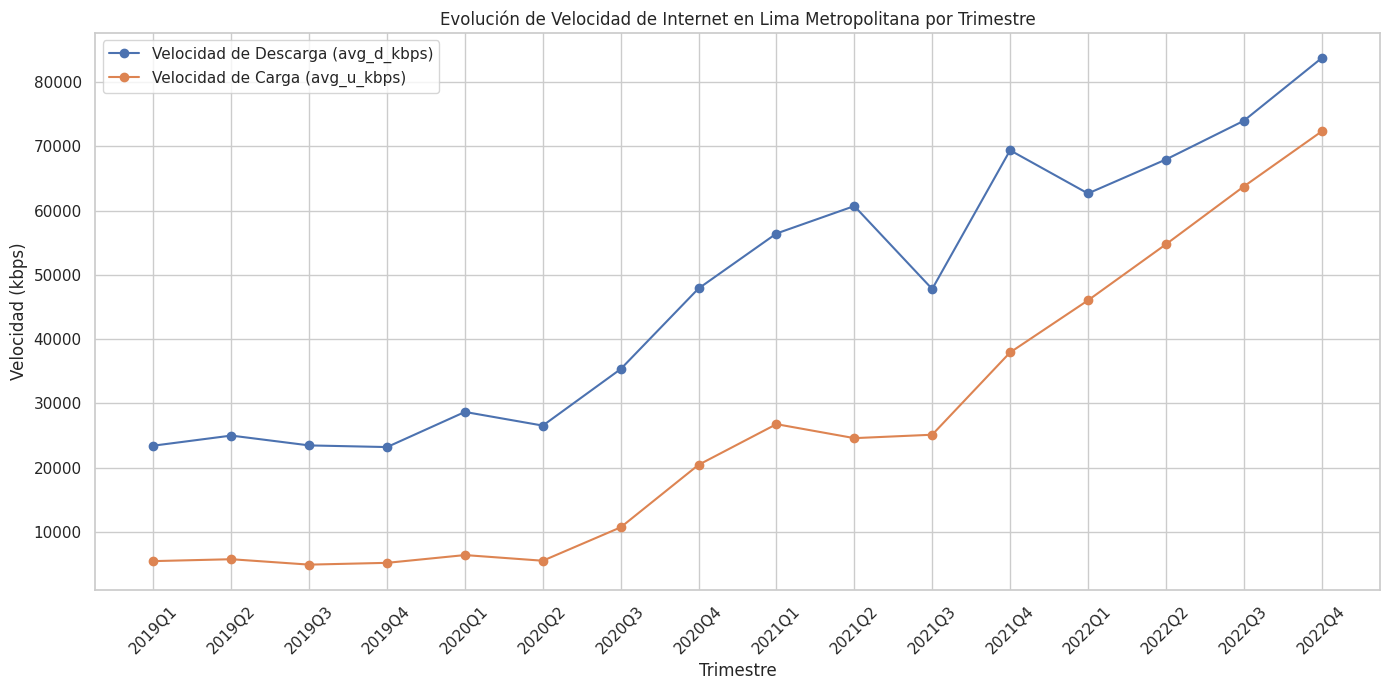

In [ ]:
quarterly_data = lima_metropolitana_data.groupby('year_quarter').agg({'avg_d_kbps': 'mean', 'avg_u_kbps': 'mean'}).reset_index()

# Configurar los gráficos
plt.figure(figsize=(14, 7))

# Graficar la velocidad de descarga promedio
plt.plot(quarterly_data['year_quarter'], quarterly_data['avg_d_kbps'], marker='o', label='Velocidad de Descarga (avg_d_kbps)')
# Graficar la velocidad de carga promedio
plt.plot(quarterly_data['year_quarter'], quarterly_data['avg_u_kbps'], marker='o', label='Velocidad de Carga (avg_u_kbps)')

# Añadir títulos y etiquetas
plt.title('Evolución de Velocidad de Internet en Lima Metropolitana por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Velocidad (kbps)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
quarterly_data.to_excel('output/quarterly_data_lima.xlsx',index = False)